In [22]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
import math as math
import seaborn as sns

TAREA: Captura una o varias imágenes con monedas no solapadas y algún objeto que no lo sea. Filtra los contornos que no se correpondan con monedas, y muestra el número total de monedas presentes en la imagen.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


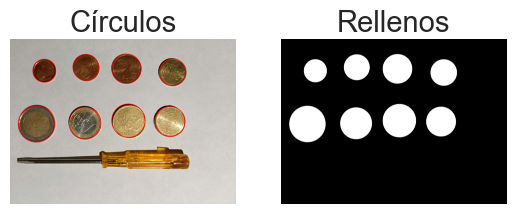

Hay 8 monedas en la imagen


In [23]:
img = cv2.imread('Monedas_destornillador.jpg') 
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

circ = cv2.HoughCircles(
        img_gris,  # imagen 
        cv2.HOUGH_GRADIENT,  # tipo de detección
        1,
        600,  # distancia mínima entre círculos
        param1=100, # Valor del gradiente
        param2=50, #Umbral acumulador
        minRadius=180,  # radio mínimo
        maxRadius=300,  # radio máximo
    )

# Dibuja los círculos en la imagen original y el relleno para comparar 
img_cont = np.zeros(img.shape)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for det in circ[0]:
        x_coor, y_coor, det_radio = det
        
        # Contornos de círculos rojos en la imagen original
        cv2.circle(img_rgb,(int(x_coor), int(y_coor)),
            int(det_radio),(255, 0, 0), 10)
        
        # Círculos rellenos de blanco
        cv2.circle(img_cont,(int(x_coor), int(y_coor)),
            int(det_radio),(255, 255, 255), -1)


# Muestra resultado
plt.subplot(121)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Círculos')

plt.subplot(122)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Rellenos')

plt.show()

print("Hay", len(circ[0]), "monedas en la imagen")

TAREA: Captura una o varias imágenes con monedas no solapadas, y otras con monedas solapadas. Identificada una moneda de un euro en la imagen, por ejemplo con un clic de ratón, calcular la cantidad de dinero presente en la imagen. ¿Qué problemas han observado?

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


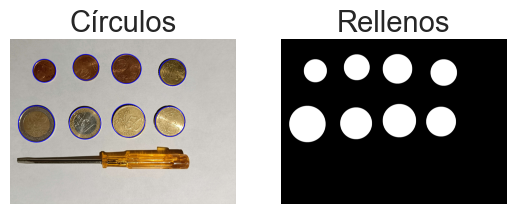

Hay 8 monedas en la imagen
1 euro
5 céntimos
2 euros
50 céntimos
20 céntimos
2 céntimos
10 céntimos
1 céntimo
Hay 3.88 € en la imagen


In [24]:
selected_circle = None

# Función para manejar el click del ratón
def on_mouse(e, x, y, flags, params):
    global selected_circle
    if e == cv2.EVENT_LBUTTONDOWN:
        # Calcula la distancia del clic de ratón a cada círculo y selecciona el más cercano
        min_distance = float('inf')
        for det in circ[0]:
            x_coor, y_coor, det_radio = det
            distance = np.sqrt((x - x_coor) ** 2 + (y - y_coor) ** 2)
            if distance < min_distance:
                min_distance = distance
                selected_circle = det
        if selected_circle is not None:
            cv2.destroyAllWindows()

img = cv2.imread('Monedas_destornillador.jpg') 
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

circ = cv2.HoughCircles(
        img_gris,  # imagen 
        cv2.HOUGH_GRADIENT,  # tipo de detección
        1,
        600,  # distancia mínima entre círculos
        param1=100, # Valor del gradiente
        param2=50, #Umbral acumulador
        minRadius=180,  # radio mínimo
        maxRadius=300,  # radio máximo
    )

# Dibuja los círculos en la imagen original y el relleno para comparar 
img_cont = np.zeros(img.shape)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for det in circ[0]:
        x_coor, y_coor, det_radio = det
        
        # Contornos de círculos rojos en la imagen original
        cv2.circle(img_rgb,(int(x_coor), int(y_coor)),
            int(det_radio),(0, 0, 255), 10)
        
        # Círculos rellenos de blanco
        cv2.circle(img_cont,(int(x_coor), int(y_coor)),
            int(det_radio),(255, 255, 255), -1)


#Muestra resultado
plt.subplot(121)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Círculos')

plt.subplot(122)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Rellenos')

plt.show()

print("Hay", len(circ[0]), "monedas en la imagen")

# Crea una ventana para la imagen
cv2.namedWindow('circles', cv2.WINDOW_NORMAL)
cv2.resizeWindow('circles', 600, 600)
selected_circle = cv2.setMouseCallback('circles', on_mouse)

# Muestra la imagen con círculos
cv2.imshow('circles', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

suma = 0
tolerancia = 4.1  # Ajusta la tolerancia según tus necesidades
radio_seleccionado = selected_circle[2]

for det in circ[0]:
     x_coor, y_coor, det_radio = det
     if abs(det_radio - (0.8 * radio_seleccionado / 1.15)) <= tolerancia + 4:
          suma += 0.01
          print("1 céntimo")
     elif abs(det_radio - (0.9 * radio_seleccionado / 1.15)) <= tolerancia + 4:
          suma += 0.02
          print("2 céntimos")
     elif abs(det_radio - (1.05 * radio_seleccionado / 1.15)) <= tolerancia:
          suma += 0.05
          print("5 céntimos")
     elif abs(det_radio - (0.95 * radio_seleccionado / 1.15)) <= tolerancia:
          suma += 0.1
          print("10 céntimos")
     elif abs(det_radio - (1.1 * radio_seleccionado / 1.15)) <= tolerancia + 4:
          suma += 0.2
          print("20 céntimos")
     elif abs(det_radio - (1.2 * radio_seleccionado / 1.15)) <= tolerancia:
          suma += 0.5
          print("50 céntimos")
     elif abs(det_radio - radio_seleccionado) <= tolerancia:
          suma += 1
          print("1 euro")
     elif abs(det_radio - (1.3 * radio_seleccionado / 1.15)) <= tolerancia:
          suma += 2
          print("2 euros")

print("Hay", round(suma, 2), "€ en la imagen")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


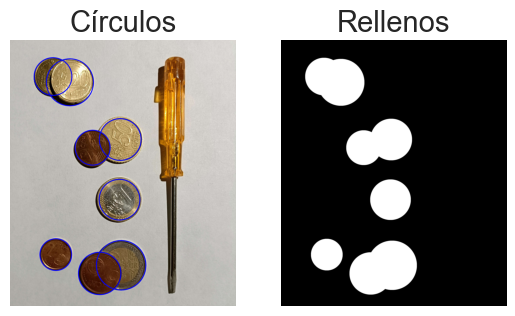

Hay 8 monedas en la imagen
1 euro
50 céntimos
2 céntimos
Hay 1.52 € en la imagen


In [25]:
selected_circle = None

# Función para manejar el click del ratón
def on_mouse(e, x, y, flags, params):
    global selected_circle
    if e == cv2.EVENT_LBUTTONDOWN:
        # Calcula la distancia del clic de ratón a cada círculo y selecciona el más cercano
        min_distance = float('inf')
        for det in circ[0]:
            x_coor, y_coor, det_radio = det
            distance = np.sqrt((x - x_coor) ** 2 + (y - y_coor) ** 2)
            if distance < min_distance:
                min_distance = distance
                selected_circle = det
        if selected_circle is not None:
            cv2.destroyAllWindows()

img = cv2.imread('Monedas_destornillador_solapadas.jpg') 
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

circ = cv2.HoughCircles(
        img_gris,  # imagen 
        cv2.HOUGH_GRADIENT,  # tipo de detección
        1,
        100,  # distancia mínima entre círculos
        param1=300, # Valor del gradiente
        param2=50, #Umbral acumulador
        minRadius=170,  # radio mínimo
        maxRadius=300,  # radio máximo
    )

# Dibuja los círculos en la imagen original y el relleno para comparar 
img_cont = np.zeros(img.shape)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for det in circ[0]:
        x_coor, y_coor, det_radio = det
        
        # Contornos de círculos rojos en la imagen original
        cv2.circle(img_rgb,(int(x_coor), int(y_coor)),
            int(det_radio),(0, 0, 255), 10)
        
        # Círculos rellenos de blanco
        cv2.circle(img_cont,(int(x_coor), int(y_coor)),
            int(det_radio),(255, 255, 255), -1)


#Muestra resultado
plt.subplot(121)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Círculos')

plt.subplot(122)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Rellenos')

plt.show()

print("Hay", len(circ[0]), "monedas en la imagen")

# Crea una ventana para la imagen
cv2.namedWindow('circles', cv2.WINDOW_NORMAL)
cv2.resizeWindow('circles', 600, 600)
selected_circle = cv2.setMouseCallback('circles', on_mouse)

# Muestra la imagen con círculos
cv2.imshow('circles', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

suma = 0
tolerancia = 3  # Ajusta la tolerancia según tus necesidades
radio_seleccionado = selected_circle[2]

for det in circ[0]:
     x_coor, y_coor, det_radio = det
     if abs(det_radio - (0.8 * radio_seleccionado / 1.15)) <= tolerancia:
          suma += 0.01
          print("1 céntimo")
     elif abs(det_radio - (0.9 * radio_seleccionado / 1.15)) <= tolerancia:
          suma += 0.02
          print("2 céntimos")
     elif abs(det_radio - (1.05 * radio_seleccionado / 1.15)) <= tolerancia:
          suma += 0.05
          print("5 céntimos")
     elif abs(det_radio - (0.95 * radio_seleccionado / 1.15)) <= tolerancia:
          suma += 0.1
          print("10 céntimos")
     elif abs(det_radio - (1.1 * radio_seleccionado / 1.15)) <= tolerancia:
          suma += 0.2
          print("20 céntimos")
     elif abs(det_radio - (1.2 * radio_seleccionado / 1.15)) <= tolerancia:
          suma += 0.5
          print("50 céntimos")
     elif abs(det_radio - radio_seleccionado) <= tolerancia:
          suma += 1
          print("1 euro")
     elif abs(det_radio - (1.3 * radio_seleccionado / 1.15)) <= tolerancia:
          suma += 2
          print("2 euros")

print("Hay", round(suma, 2), "€ en la imagen")


TAREA: Estas tres imágenes han sido extraidas de las imágenes de mayor tamaño contenidas en la carpeta. Determina patrones geométricos para cada una de las tres clases y evalúa los aciertos y fallos con las imágenes completas la matriz de confusión. Para cada clase, determina el número de muestras que se clasifican correctamente de dicha clase, y el número de muestras que se clasifica incorrectamente por cada una de las otras dos clases.

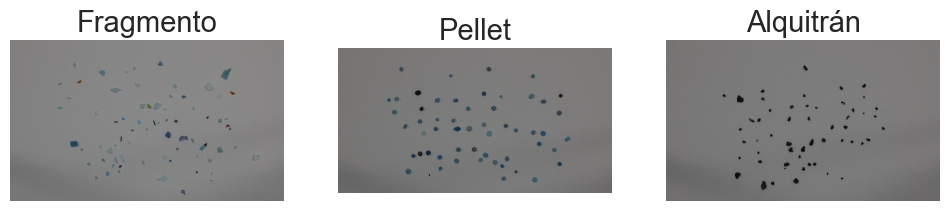

In [26]:
# Carga de las imágenes
imagen_frag = cv2.imread('fragment-03-olympus-10-01-2020.JPG')
imagen_pel = cv2.imread('pellet-03-olympus-10-01-2020.JPG')
imagen_tar = cv2.imread('tar-03-olympus-10-01-2020.JPG')

# Imágenes a escala de grises
frag_gris = cv2.cvtColor(imagen_frag, cv2.COLOR_BGR2GRAY)
pel_gris = cv2.cvtColor(imagen_pel, cv2.COLOR_BGR2GRAY)
tar_gris = cv2.cvtColor(imagen_tar, cv2.COLOR_BGR2GRAY)

# Suavizado de los bordes de la imagen de fragmentos para el umbralizado
frag_gris = cv2.GaussianBlur(frag_gris, (15, 15), 0)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title('Fragmento')
plt.axis("off")
plt.imshow(imagen_frag,cmap='gray') 

plt.subplot(1, 3, 2)
plt.title('Pellet')
plt.axis("off")
plt.imshow(imagen_pel,cmap='gray') 

plt.subplot(1, 3, 3)
plt.title('Alquitrán')
plt.axis("off")
plt.imshow(imagen_tar,cmap='gray') 

plt.show()

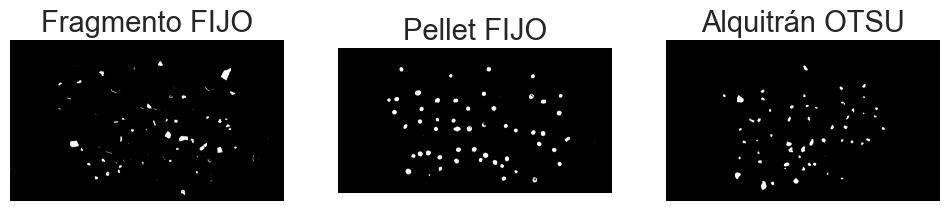

In [27]:
# Umbralizado normal
res,umbral_frag = cv2.threshold(frag_gris,110,255,cv2.THRESH_BINARY_INV)
res,umbral_pel = cv2.threshold(pel_gris,90,255,cv2.THRESH_BINARY_INV)

# Umbralizado con método de Otsu
res,umbral_tar = cv2.threshold(tar_gris,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Mostrar las imágenes umbralizadas
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title('Fragmento FIJO')
plt.axis("off")
plt.imshow(umbral_frag,cmap='gray') 

plt.subplot(1, 3, 2)
plt.title('Pellet FIJO')
plt.axis("off")
plt.imshow(umbral_pel,cmap='gray') 

plt.subplot(1, 3, 3)
plt.title('Alquitrán OTSU')
plt.axis("off")
plt.imshow(umbral_tar,cmap='gray') 

plt.show()

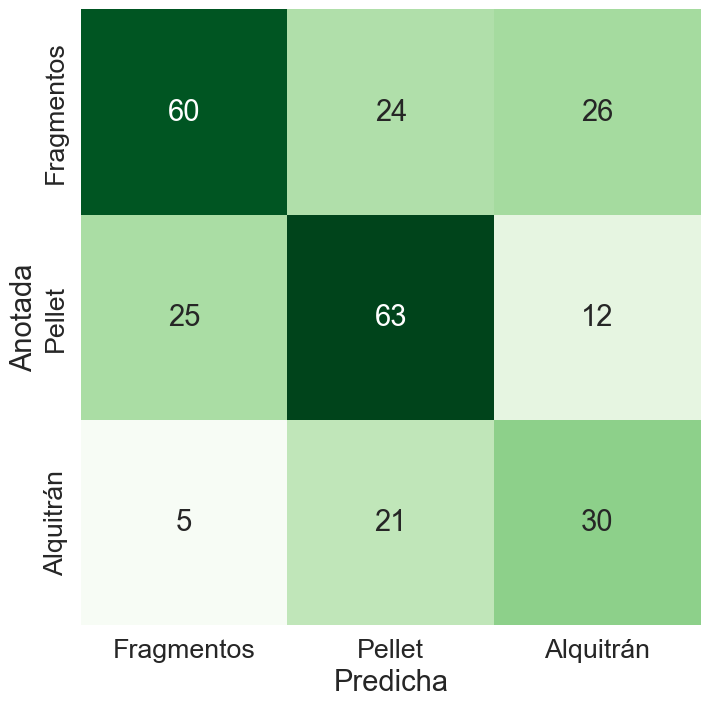

In [28]:
# Función para contar elementos de cada clase en una imagen
def count(imagen):

    # Encontrar los contornos en la imagen
    contornos, res = cv2.findContours(imagen, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Contar elementos de cada clase (fragmentos, pellets, alquitrán)
    fragmentos = 0  
    pellet = 0 
    alquitran = 0

    for contorno in contornos:
        # Área del contorno
        area = cv2.contourArea(contorno)

        # Perímetro del contorno
        perimetro = cv2.arcLength(contorno, True)

        # Contenedor alineado con ejes de la imagen (Bounding Box)
        m, n, w, h = cv2.boundingRect(contorno)

        # Mínimo círculo que lo contiene
        (cx, cy), radio = cv2.minEnclosingCircle(contorno)

        # Elipse que contiene el contorno
        eje_mayor, eje_menor, rel_ejes, exc = 0, 0, 0, 0
        if contorno.shape[0] > 5:
            elipse = cv2.fitEllipse(contorno)

        # Calcula la relación entre el área del contorno y el área del contenedor
        rel_area = area / (w * h)

        if np.isclose(w/h, 1.0, rtol=0.1):
            pellet += 1 # Si es parecido a un círculo por la forma de su elipse, es pellet
        elif rel_area < 0.6 and rel_ejes < 0.78:
            fragmentos += 1 # Si la forma no es parecida a la elipse, es un fragmento 
        else:
            alquitran += 1 # Si no, es alquitrán

        # # Impresión de las características
        # print("\nÁrea:", area)
        # print("Perímetro:", perimetro)
        # print("Relación de Aspecto:", relacion_aspecto)
        # print("Compacidad:", compacidad)
        # print("Relación Área/Contenedor:", relacion_area_contenedor)
        # print("Relación Ejes Elipse:", relacion_ejes_elipse)
        # print("Excentricidad:", excentricidad)

    return [fragmentos, pellet, alquitran]

# Contar elementos de cada clase en cada imagen
fragmentos = count(umbral_frag)
pellets = count(umbral_pel)
alquitran = count(umbral_tar)

# Crear una matriz de confusión global
conf_matrix = np.array([fragmentos, pellets, alquitran])

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 8))
sns.set(font_scale=1.75)
sns.heatmap(conf_matrix,
             annot=True,
             fmt='d',
             cbar=False, 
             cmap='Greens', 
             xticklabels=['Fragmentos', 'Pellet', 'Alquitrán'], 
             yticklabels=['Fragmentos', 'Pellet', 'Alquitrán'])
plt.xlabel("Predicha")
plt.ylabel("Anotada")
plt.show()